In [30]:
import pandas as pd
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from validate_email import validate_email
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

with open('/home/monica/mp_new.json') as data_file:
   data = json.load(data_file)

### What is the number of records?

In [31]:
num_records = len(data)
print("Number of records: {}".format(num_records))

Number of records: 306792


### What does each record look like?

In [32]:
print(data[0])

{'_id': {'$oid': '5b87bcabb56baf6f61c255b4'}, 'event': 'pageView', 'properties': {'city': 'Bengaluru', 'initial_referring_domain': 'www.youtube.com', 'screen_width': 1280, 'initial_referrer': 'https://www.youtube.com/', 'screen_height': 720, 'referrer': 'https://www.youtube.com/', 'region': 'Karnataka', 'mp_lib': 'web', 'utm_campaign': 'enrol-statistics-tutorial-FmWz4deqo9g_medium=VM', 'current_url': 'https://acadgild.com/big-data/deep-learning-course-training-certification?utm_campaign=enrol-statistics-tutorial-FmWz4deqo9g_medium=VM&utm_source=youtube', 'lib_version': '2.22.4', 'browser_version': 67, 'distinct_id': '16454a432b02ef-00fe07f10d6e26-47e1039-e1000-16454a432b238e', 'utm_source': 'youtube', 'time': 1530403204, 'mp_country_code': 'IN', 'referring_domain': 'www.youtube.com', 'os': 'Windows', 'browser': 'Chrome'}}


### What does 'id' field contain?

In [33]:
print(data[0]['_id'])

{'$oid': '5b87bcabb56baf6f61c255b4'}


### What does 'event' field contain?

In [34]:
print(data[0]['event'])

pageView


### What does 'properties' field contain?

In [35]:
print(data[0]['properties'])
print(len((data[0]['properties'].keys())))
print(data[0]['properties'].keys())
print('-'*100)
print(data[298994]['properties'].keys())
print('-'*100)

for i in range(len(data)):
    if(len(data[i]['properties'].keys()) > 23):
        print(i, len(data[i]['properties'].keys()))

{'city': 'Bengaluru', 'initial_referring_domain': 'www.youtube.com', 'screen_width': 1280, 'initial_referrer': 'https://www.youtube.com/', 'screen_height': 720, 'referrer': 'https://www.youtube.com/', 'region': 'Karnataka', 'mp_lib': 'web', 'utm_campaign': 'enrol-statistics-tutorial-FmWz4deqo9g_medium=VM', 'current_url': 'https://acadgild.com/big-data/deep-learning-course-training-certification?utm_campaign=enrol-statistics-tutorial-FmWz4deqo9g_medium=VM&utm_source=youtube', 'lib_version': '2.22.4', 'browser_version': 67, 'distinct_id': '16454a432b02ef-00fe07f10d6e26-47e1039-e1000-16454a432b238e', 'utm_source': 'youtube', 'time': 1530403204, 'mp_country_code': 'IN', 'referring_domain': 'www.youtube.com', 'os': 'Windows', 'browser': 'Chrome'}
19
dict_keys(['city', 'initial_referring_domain', 'screen_width', 'initial_referrer', 'screen_height', 'referrer', 'region', 'mp_lib', 'utm_campaign', 'current_url', 'lib_version', 'browser_version', 'distinct_id', 'utm_source', 'time', 'mp_country

### What are the unique events stored in the data?

In [36]:
events = []
for record in range(len(data)):
    if (data[record]['event'] not in events):
        events.append(data[record]['event'])
        
print(events)

['pageView', 'coursepage-navigator-curriculum', 'coursepage-navigator-coursecomparison', 'coursepage-navigator-whythiscourse', 'coursepage-navigator-acadgildexperience', 'course-page-download-syllabus-btn', 'coursepage-navigator-faqs', 'coursepage-navigator-courseoverview', 'coursepage-stickyform-enrollnow-btn', 'campaign_delivery']


### What are the properties of the lead being stored?

In [37]:
print(list(data[0]['properties'].keys()))

['city', 'initial_referring_domain', 'screen_width', 'initial_referrer', 'screen_height', 'referrer', 'region', 'mp_lib', 'utm_campaign', 'current_url', 'lib_version', 'browser_version', 'distinct_id', 'utm_source', 'time', 'mp_country_code', 'referring_domain', 'os', 'browser']


### Create a dataframe with relevant columns

In [38]:
column_names = ['id', 'event', 'utm_content', 'browser_version', 'search_engine', 'city', \
                'initial_referring_domain', 'lib_version', 'utm_medium', 'browser', 'screen_width',\
                'initial_referrer', 'utm_campaign', 'time', 'current_url', 'distinct_id', 'utm_source',\
                'device', 'mp_country_code', 'referrer', 'region', 'mp_lib', 'mp_processing_time_ms', \
                'referring_domain', 'os', 'screen_height']

b_data = pd.DataFrame(columns = column_names)
    
b_data['id'] = pd.Series([data[x]['_id']['$oid'] for x in range(len(data))])
b_data['event'] = pd.Series([data[x]['event'] for x in range(len(data))])



#There may be missing fields for a record
print(column_names[2:])
print(data[0]['properties'].keys())
print([column in data[0]['properties'].keys() for column in column_names[2:] ])

print(b_data.info())

for x in range(len(data)):
    for column in column_names[2:]:  
        if (column in data[x]['properties'].keys()):
            b_data.iloc[x][column] = data[x]['properties'][column]
        
    
    
    
    
    #b_data[x] = pd.Series([data[x]['properties'][column] for column in column_names[2:] if column in data[x]['properties'].keys()])


#
    #print(data[x]['properties'].keys())
    #b_data.iloc[x] = pd.Series([data[x][column] for column in column_names[2:] if column in data[x]['properties'].keys()])
                              
#    
    #b_data[column] = pd.Series([data[x]['properties'][column] for x in range(len(data)) \
          #                      if column in data[x]['properties'].keys()])

  


['utm_content', 'browser_version', 'search_engine', 'city', 'initial_referring_domain', 'lib_version', 'utm_medium', 'browser', 'screen_width', 'initial_referrer', 'utm_campaign', 'time', 'current_url', 'distinct_id', 'utm_source', 'device', 'mp_country_code', 'referrer', 'region', 'mp_lib', 'mp_processing_time_ms', 'referring_domain', 'os', 'screen_height']
dict_keys(['city', 'initial_referring_domain', 'screen_width', 'initial_referrer', 'screen_height', 'referrer', 'region', 'mp_lib', 'utm_campaign', 'current_url', 'lib_version', 'browser_version', 'distinct_id', 'utm_source', 'time', 'mp_country_code', 'referring_domain', 'os', 'browser'])
[False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306792 entries, 0 to 306791
Data columns (total 26 columns):
id                          306792 non-null object
event                       306792 n

In [39]:
print(b_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306792 entries, 0 to 306791
Data columns (total 26 columns):
id                          306792 non-null object
event                       306792 non-null object
utm_content                 719 non-null object
browser_version             287821 non-null object
search_engine               108707 non-null object
city                        271684 non-null object
initial_referring_domain    294419 non-null object
lib_version                 294419 non-null object
utm_medium                  140201 non-null object
browser                     294396 non-null object
screen_width                294419 non-null object
initial_referrer            294419 non-null object
utm_campaign                139571 non-null object
time                        306792 non-null object
current_url                 294419 non-null object
distinct_id                 306792 non-null object
utm_source                  140825 non-null object
device                   

### Getting number of unique values possible for Region, City, MP_Country_Code for Location information

In [40]:
print(len(list(b_data['city'].unique())))
print(len(list(b_data['region'].unique())))
print(len(list(b_data['mp_country_code'].unique())))

3529
893
151


In [41]:
print(list(b_data['city'].unique()))
print("=" * 70)
print(list(b_data['region'].unique()))
print("=" * 70)
print(list(b_data['mp_country_code'].unique()))
print("=" * 70)

['Bengaluru', 'Edappal', 'Delhi', 'Vadodara', 'Hyderabad', 'Singapore', 'Chennai', 'Mumbai', 'Bhubaneswar', 'Jaipur', 'Seattle', 'Kolkata', 'Ghaziabad', 'Dubai', 'Pune', 'Muzaffarnagar', 'New Delhi', 'San Diego', nan, 'Vienna', 'San Mateo', 'Fredericksburg', 'Kochi', 'San Francisco', 'Colombo', 'Jamnagar', 'New Brunswick', 'Gurgaon', 'Ahmedabad', 'New York', 'Brooklyn', 'Mountain View', 'Udaipur', 'Amman', 'Chichawatni', 'Kozhikode', 'Rajahmundry', 'Patna', 'Ernakulam', 'Dehradun', 'Jalalpur', 'Thane', 'Lucknow', 'Milpitas', 'Kensington', 'Mathura', 'Bhopal', 'Moradabad', 'Calgary', 'Ludhiana', 'Kalingia', 'Kanchrapara', 'Kakrola', 'Jabalpur', 'Indore', 'Lahore', 'Gatineau', 'Thiruvananthapuram', 'Shah Alam', 'Bhilai', 'Tiruppur', 'Yangon', 'Norcross', 'Noida', 'Bedford', 'Banga', 'Alhambra', 'Nagar', 'Hosur', 'San Jose', 'Visakhapatnam', 'Rajkot', 'Patiala', 'Panipat', 'Houston', 'Cambridge', 'Codlea', 'Wolverhampton', 'Central', 'Kapurthala Town', 'Meerut', 'Paris', 'Firozabad', 'Jaj

['IN', 'SG', 'US', 'AE', 'KE', 'AT', 'LK', nan, 'GB', 'JO', 'PK', 'AU', 'CA', 'IE', 'MY', 'MM', 'RO', 'HK', 'FR', 'HU', 'MA', 'SA', 'NG', 'CH', 'GE', 'IT', 'ZA', 'NP', 'OM', 'JP', 'NL', 'EC', 'GR', 'RU', 'DK', 'PE', 'MV', 'SO', 'DE', 'PR', 'VE', 'IQ', 'CN', 'GH', 'SE', 'VN', 'BD', 'AF', 'BR', 'NO', 'LB', 'ID', 'EE', 'KH', 'IL', 'BH', 'PT', 'NZ', 'NA', 'HR', 'TR', 'ET', 'UG', 'QA', 'ZW', 'CL', 'BG', 'TH', 'PH', 'SN', 'KR', 'TN', 'CZ', 'AR', 'PL', 'UA', 'CR', 'TW', 'MX', 'RS', 'KW', 'EG', 'HT', 'PS', 'CO', 'GM', 'ES', 'BE', 'LT', 'CM', 'AZ', 'UZ', 'TZ', 'GT', 'AL', 'IM', 'TT', 'LR', 'DZ', 'PA', 'LV', 'FI', 'SC', 'MU', 'JM', 'BA', 'BY', 'FJ', 'LA', 'CY', 'SK', 'ZM', 'GN', 'BW', 'YE', 'CD', 'VI', 'BF', 'DO', 'RW', 'CI', 'SZ', 'AW', 'GU', 'NE', 'LY', 'LS', 'CW', 'SL', 'BB', 'LU', 'MN', 'SI', 'BI', 'MK', 'KZ', 'AM', 'MT', 'BO', 'MD', 'BT', 'CF', 'MZ', 'HN', 'MW', 'ME', 'CG', 'BN', 'AO', 'TJ', 'MG']


### Visualizing the distribution of browsers by Country

In [42]:
print(b_data[b_data['city'] == 'Ellenwood'])

                             id     event utm_content browser_version  \
7184   5b87bcb4b56baf6f61c271c4  pageView         NaN              60   
67154  5b87be1fb56baf6f61c35c06  pageView         NaN              67   

      search_engine       city initial_referring_domain lib_version  \
7184            NaN  Ellenwood          www.youtube.com      2.22.4   
67154        google  Ellenwood                   direct      2.22.4   

      utm_medium  browser      ...      utm_source device mp_country_code  \
7184          VM  Firefox      ...         youtube    NaN              US   
67154        NaN   Chrome      ...             NaN    NaN              US   

                       referrer   region mp_lib mp_processing_time_ms  \
7184   https://www.youtube.com/  Georgia    web                   NaN   
67154                       NaN  Georgia    web                   NaN   

      referring_domain       os screen_height  
7184   www.youtube.com  Windows           768  
67154             

<BarContainer object of 4 artists>

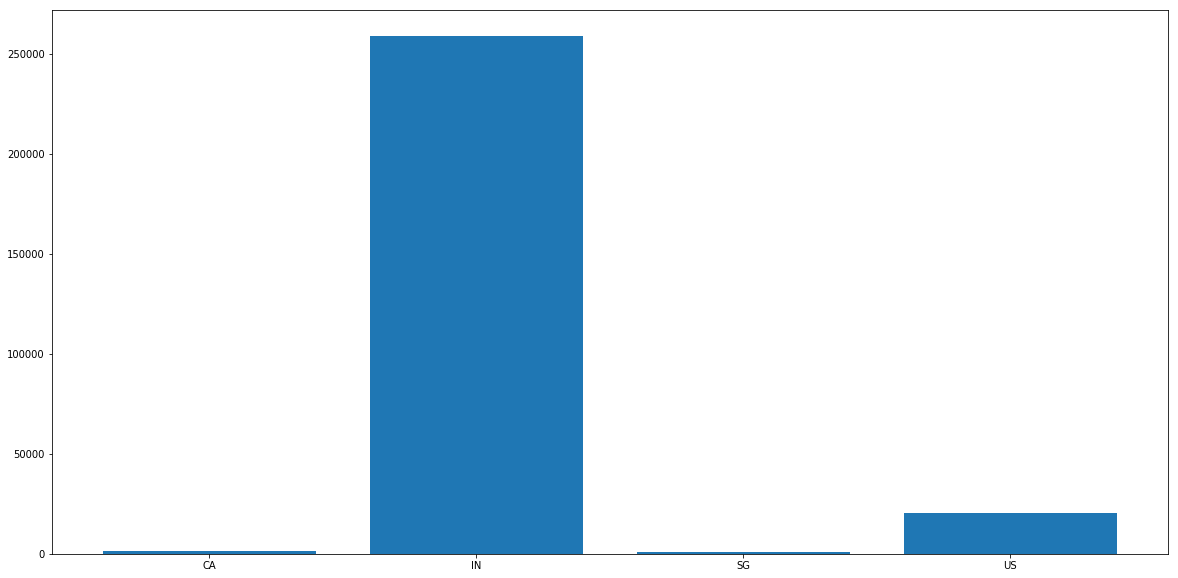

In [43]:

India_data = b_data[b_data['mp_country_code'] == 'IN']

#print(len(list(India_data['city'].unique())))
#print("=" * 100)
#print(list(India_data['city'].unique()))

#f.groupby("Col2").filter(lambda x: len(x) >= 5) 
grouped_data = b_data['mp_country_code'].groupby([b_data['mp_country_code']]).count()
new_df = grouped_data.to_frame(name = 'size').reset_index()

new_df1 = new_df[new_df['size'] >= 1000]

plt.figure(figsize=(20,10))
plt.bar(new_df1['mp_country_code'], new_df1['size'])






In [44]:
US_data = b_data[b_data['mp_country_code'] == 'US']

print(len(list(US_data['city'].unique())))
print("="*100)
print(list(US_data['city'].unique()))


1083
['Seattle', 'San Diego', 'San Mateo', 'Fredericksburg', 'San Francisco', 'New Brunswick', 'New York', 'Brooklyn', 'Mountain View', 'Milpitas', 'Norcross', 'Alhambra', 'San Jose', 'Houston', 'Charlotte', 'Boynton Beach', 'Gaithersburg', 'Oklahoma City', 'Minnetonka', 'Lancaster', 'Columbus', 'Solon', 'Huntersville', 'Sacramento', nan, 'Irving', 'Aurora', 'Ames', 'North Richland Hills', 'Cupertino', 'Naperville', 'Fairfax', 'Bloomington', 'Collierville', 'Cumming', 'Memphis', 'Santa Clara', 'Atlanta', 'Dublin', 'Plano', 'Boston', 'Denver', 'Cementon', 'Ashburn', 'Mount Holly', 'Bellevue', 'Loma Linda', 'Fremont', 'St Louis', 'Palo Alto', 'Campbell', 'Phoenix', 'Dallas', 'Tempe', 'Chelmsford', 'Irvine', 'Woodhaven', 'Piscataway', 'Los Angeles', 'Cedar Park', 'Chicago', 'Pharr', 'Naples', 'Pleasanton', 'Portland', 'Hoboken', 'West Chester', 'Lowell', 'Philadelphia', 'Port Orange', 'Stone Mountain', 'Interlaken', 'Hanford', 'Madison', 'Oakland', 'Delray Beach', 'Chico', 'Toledo', 'Ches

In [45]:
data1=b_data[(b_data['mp_country_code'] != 'US') & (b_data['mp_country_code'] != 'IN') ]
print(len(list(data1['city'].unique())))
print("=" * 100)
print(list(data1['city'].unique()))

1395
['Singapore', 'Dubai', nan, 'Vienna', 'Colombo', 'Amman', 'Chichawatni', 'Kensington', 'Calgary', 'Lahore', 'Gatineau', 'Shah Alam', 'Yangon', 'Bedford', 'Cambridge', 'Codlea', 'Wolverhampton', 'Central', 'Paris', 'London', 'Mosonmagyaróvár', 'Douar Jdida', 'Riyadh', 'Toronto', 'Douar Tardane', 'Merrylands', 'Lagos', 'Brisbane', 'Ajax', 'Dammam', 'Tbilisi', 'Bristol', 'Puchong Batu Dua Belas', 'Pretoria', 'Kathmandu', 'Derby', 'Burwood', 'Tokyo', 'Vancouver', 'North York', 'Guayaquil', 'Markham', 'Muscat', 'Ipoh', 'Mississauga', 'Montreal', 'Hounslow', 'Surry Hills', 'Athens', 'Bikin', 'Nairobi', 'Copenhagen', 'Islamabad', 'Etobicoke', 'Almere Stad', 'Trujillo', 'Malé', 'Mira', 'Aurora', 'Croydon', 'Winnipeg', 'Karachi', 'Brampton', 'Edmonton', 'Walsall', 'Sora', 'Iași', 'Sharjah', 'Stoke Newington', 'Heuchelheim', 'Wolfsburg', 'Walthamstow', 'Benin City', 'Casablanca', 'San Juan', 'Hendra', 'Amsterdam', 'Poelten', 'Sulaymaniyah', 'Johor Bahru', 'Saitama', 'Milton', 'Saint Lucia',

### Visualizing the distribution of Current_URL of browsers.

['enrol-statistics-tutorial-FmWz4deqo9g_medium=VM', nan, 'FB_AG_Fullstack_IN_WC_traffic_ad', 'fulllstack_search', 'btm_display_2306?aff_id=5077', 'AG_FB_NC_IN_WC_BigData_lookalike_mobile_2girl', 'Data_Science', 'DataAnalytics_1152', 'bigdata_lowintent_ind_0905', 'AG_FB_WC_LI_IN_Android_Ad', 'data_analytics_adcanopus_Dec', 'AG_FB_NC_IN_WC_DataScience_25-45_alldivices_lp_video', 'datascience_us_0904', 'AG_FB_TTL_BigData', 'ag_bd_1904', 'android_lowintent_fb?aff_id=5074', 'Seminar_Marathahalli_7_Jul', 'youtube_channel', 'AG_FB_NC_IN_WC_DataR_alldevices_lookalike', 'FB AG TTL campaign', 'AG_FB_TTL_US_Fullstack', 'bigdata_adcanopus_Dec', 'DataScienceMay', 'DataScienceJune', 'ag_da_1904', 'marathalli_display_2306?aff_id=5077', 'ag_main_lp', 'android_lowintent', 'BigdataMay', 'ds_bootcamp_mktg_1905', 'DS_Discount', 'ag_lowintent_brand', 'webinar_LP', 'btm_display_2306', 'AG_FB_TTL_Data_analytics_for_managers', 'DataScience', 'ag_g_display_devops_cp', 'BigdataJune', 'ag_g_brand_home', 'AG_FB_N

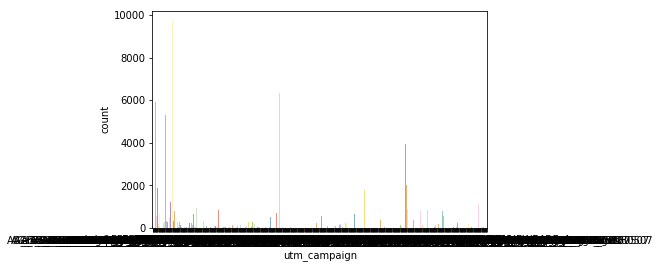

In [46]:
print(list(b_data['utm_campaign'].unique()))
sns.countplot(x="utm_campaign", data=b_data, palette="Set3")

In [47]:
#b_data['utm_campaign'] = b_data['utm_campaign'].str.lower()

android_records = b_data[(b_data["utm_campaign"].str.contains('android',na=False))]

print(list(android_records['utm_campaign'].unique()))

print(android_records.count())

android_records['utm_campaign'].replace('.*android.*', 'Android', regex=True, inplace=True,)
print(list(android_records['utm_campaign'].unique()))
print(android_records.count())

['android_lowintent_fb?aff_id=5074', 'android_lowintent', 'android_display', 'enrol-android-interview-questions-part1-tQDEgTdDmKc_medium=VM', 'android_adcanopus_Dec', 'enrol-android-interview-questions-part3-4B_HLt4tDAk_medium=VM', 'enrol-android-interview-questions-part2-tQDEgTdDmKc_medium=VM', 'android_lowintent_fb', 'ag_g_display_android_ind', 'enrol-android-interview-questions-part6-2ISikgzd-lI_medium=VM', 'M_38-55_android_acadgildjunior1', 'enrol-android-interview-questions-part4-zTy_ImwjQ1E_medium=VM', 'android_email', 'enrol-android-interview-questions-part5-qvmTcaNIVVs_medium=VM', 'M_34-52_android_acadgildjunior1_bnglore', 'FB_AG_android_TTL']
id                          712
event                       712
utm_content                  22
browser_version             709
search_engine                25
city                        658
initial_referring_domain    712
lib_version                 712
utm_medium                  547
browser                     712
screen_width        

/home/monica/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
'''
b_data['utm_campaign'].replace('.*android.*', 'Android', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*statistics.*', 'Statistics', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*fullstack.*', 'Fullstack', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)

b_data['utm_campaign'].replace('.*dataanalytics.*', 'DataAnalytics', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*data_analytics.*', 'DataAnalytics', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*data_science.*', 'DataScience', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)
'''

"\nb_data['utm_campaign'].replace('.*android.*', 'Android', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*statistics.*', 'Statistics', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*fullstack.*', 'Fullstack', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)\n\nb_data['utm_campaign'].replace('.*dataanalytics.*', 'DataAnalytics', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*data_analytics.*', 'DataAnalytics', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*data_science.*', 'DataScience', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)\n"

In [49]:
'''
ds_cnt = b_data[(b_data["utm_campaign"].str.contains('datascience',na=False))].count()
print(ds_cnt)
ds_cnt1 = b_data[(b_data["utm_campaign"].str.contains('data_science',na=False))].count()
print(ds_cnt1)
#regex_pat = re.compile(r'data_science', flags=re.IGNORECASE)
#b_data['utm_campaign'].str.replace(regex_pat, 'datascience')
#print(b_data[b_data['utm_campaign'] == 'datascience'].count())
'''

'\nds_cnt = b_data[(b_data["utm_campaign"].str.contains(\'datascience\',na=False))].count()\nprint(ds_cnt)\nds_cnt1 = b_data[(b_data["utm_campaign"].str.contains(\'data_science\',na=False))].count()\nprint(ds_cnt1)\n#regex_pat = re.compile(r\'data_science\', flags=re.IGNORECASE)\n#b_data[\'utm_campaign\'].str.replace(regex_pat, \'datascience\')\n#print(b_data[b_data[\'utm_campaign\'] == \'datascience\'].count())\n'

In [50]:
print(len(list(b_data['utm_source'].unique())))
print(list(b_data['utm_source'].unique()))

55
['youtube', nan, 'display', 'google', 'adcanopus', 'paid', 'affiliate', 'facebook', 'google_lowintent', 'Facebook', 'Facebook-TTL', 'drip', 'email', 'Quora(organic)', 'Blog(organic)', 'Instagram', 'Facebook?utm_medium=social', 'linkedin', 'facebook-paid-ttl', 'drip_mailer2', 'Quora', 'Chat', 'CourseReport', 'collegeduniya', 'netcore', 'andorid course', 'CareerMeet', 'google,google', 'churn', 'dsvsde', 'socialmedia', 'face', 'quora', 'way2online', 'twitter.com', 'twitter', 'DataCamp.com', 'pla', 'sulekha', 'rss', 'indira_nagar', 'onesignal', 'Brochure', 'sms', 'blog-post', 'blog', 'trustpilot', 'Google', 'coursereport', 'youtubehttps://www.google.com.bd', 'webpush', 'Website Event Page', 'Linkedin', 'Quora?utm_medium=social', 'popup']


32
32


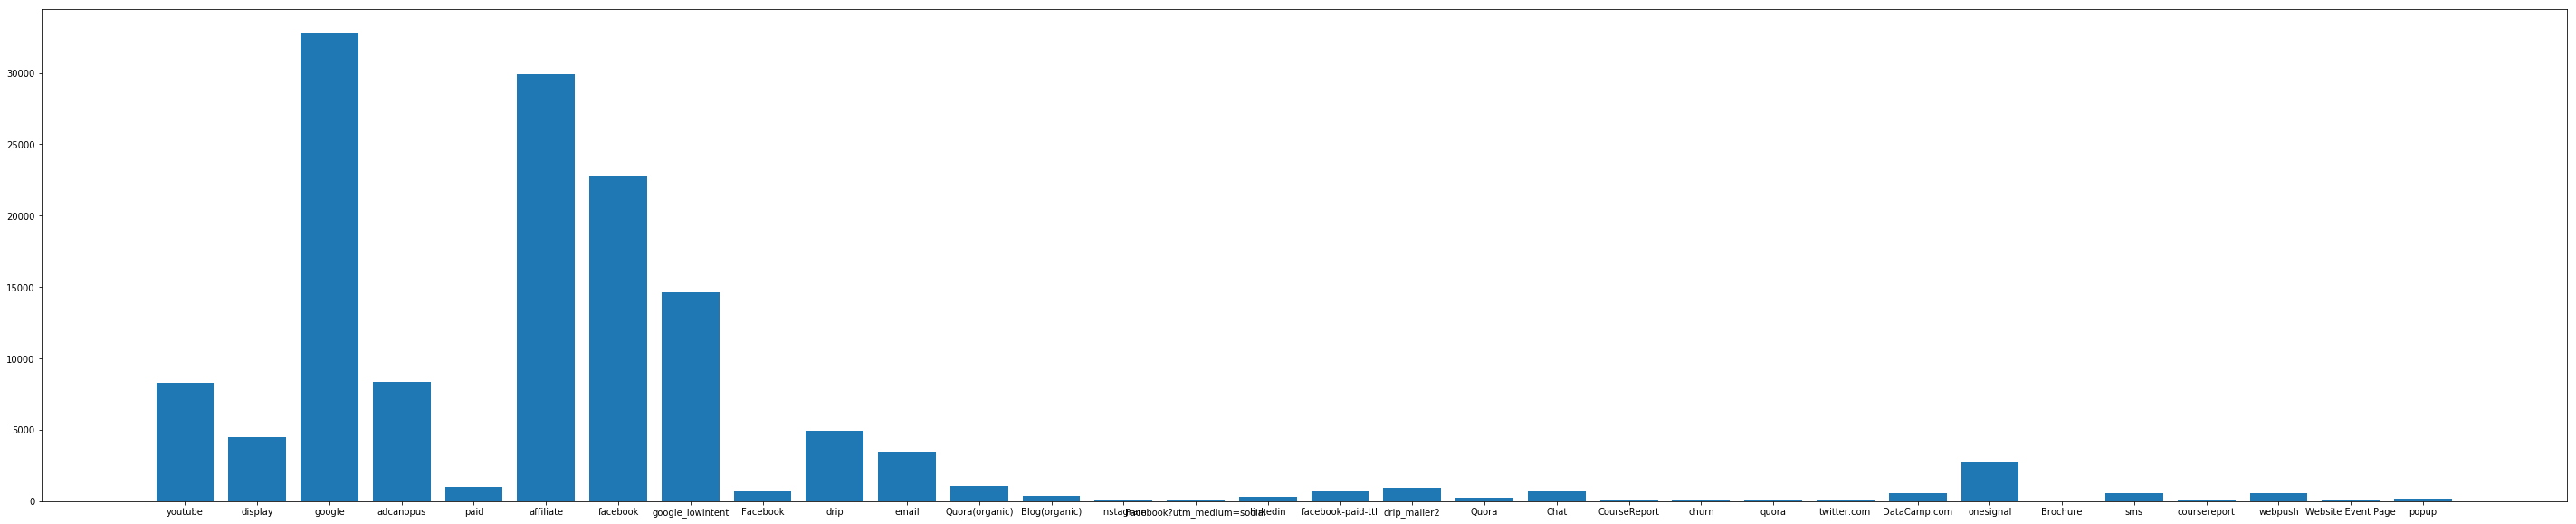

In [51]:
fig = plt.gcf()
fig.set_size_inches(50,10) 

sources = list(b_data['utm_source'].unique())
source_freq = [b_data[b_data['utm_source'] == s].shape[0] for s in sources]

s1 = []
s_f1 = []

for i in range(len(sources)):
    if(source_freq[i] > 20):
        s1.append(sources[i])
        s_f1.append(source_freq[i])

print(len(s1))
print(len(s_f1))


# Plot
#plt.pie(s_f1, labels=s1, autopct='%1.1f%%', startangle=30)
 
#plt.axis('equal')
plt.bar(s1, s_f1)
plt.show()

In [52]:
print(list(b_data['current_url'].unique())[:10])

['https://acadgild.com/big-data/deep-learning-course-training-certification?utm_campaign=enrol-statistics-tutorial-FmWz4deqo9g_medium=VM&utm_source=youtube', 'https://acadgild.com/big-data/data-analytics-training-certification', 'https://acadgild.com/web-development/full-stack-web-development-training-certification?aff_id=6026&source=display&account=facebook_marketinglead&campaign=FB_AG_Fullstack_IN_WC_traffic_ad&utm_source=display&utm_medium=facebook_marketinglead&utm_campaign=FB', 'https://acadgild.com/web-development/full-stack-web-development-training-certification/?aff_id=5080&utm_source=google&utm_medium=search&utm_campaign=fulllstack_search&gclid=Cj0KCQjw1NzZBRCoARIsAIaMwuupyZ2ENDpkGDGMI1QWEoeHXvt00DgSLsrzyHwNOBedQyXQaIbJbcgaAq', 'https://acadgild.com/our-bangalore-marathahalli-center', 'https://acadgild.com/', 'https://acadgild.com/big-data/big-data-development-training-certification?aff_id=6026&source=display&account=facebook_marketinglead&campaign=AG_FB_NC_IN_WC_BigData_looka

In [55]:
#data2=b_data[b_data.id.str.contains(r'[^@]+@[^@]+\.[^@]+', na=False, regex=True)]
pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)") 
#b_data['isemail'] = b_data['id'].apply(lambda x: True if pattern.match(x) else False)
b_data['is_valid_email'] = b_data['distinct_id'].apply(lambda x:validate_email(x))
print(list(b_data['is_valid_email'].unique()))


[False, True]


In [57]:
valid_leads = b_data[b_data['is_valid_email'] == True]

In [58]:
print(valid_leads.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32914 entries, 14 to 306789
Data columns (total 27 columns):
id                          32914 non-null object
event                       32914 non-null object
utm_content                 75 non-null object
browser_version             20399 non-null object
search_engine               8866 non-null object
city                        19271 non-null object
initial_referring_domain    20544 non-null object
lib_version                 20544 non-null object
utm_medium                  7504 non-null object
browser                     20544 non-null object
screen_width                20544 non-null object
initial_referrer            20544 non-null object
utm_campaign                7467 non-null object
time                        32914 non-null object
current_url                 20544 non-null object
distinct_id                 32914 non-null object
utm_source                  7555 non-null object
device                      5667 non-null obje

In [59]:
print(valid_leads.head(10))

                           id     event utm_content browser_version  \
14   5b87bcabb56baf6f61c255c2  pageView         NaN              67   
102  5b87bcabb56baf6f61c2561a  pageView         NaN              67   
110  5b87bcabb56baf6f61c25622  pageView         NaN              67   
167  5b87bcabb56baf6f61c2565b  pageView         NaN              59   
200  5b87bcabb56baf6f61c2567c  pageView         NaN              67   
204  5b87bcabb56baf6f61c25680  pageView         NaN              67   
296  5b87bcabb56baf6f61c256dc  pageView         NaN              67   
313  5b87bcabb56baf6f61c256ed  pageView         NaN              67   
320  5b87bcabb56baf6f61c256f4  pageView         NaN              67   
322  5b87bcabb56baf6f61c256f6  pageView         NaN              61   

    search_engine       city  initial_referring_domain lib_version  \
14            NaN  Bengaluru    dashboard.acadgild.com      2.22.4   
102           NaN  Hyderabad            m.facebook.com      2.22.4   
110     

In [61]:
print(len(valid_leads['mp_country_code'].unique()))

59


<BarContainer object of 6 artists>

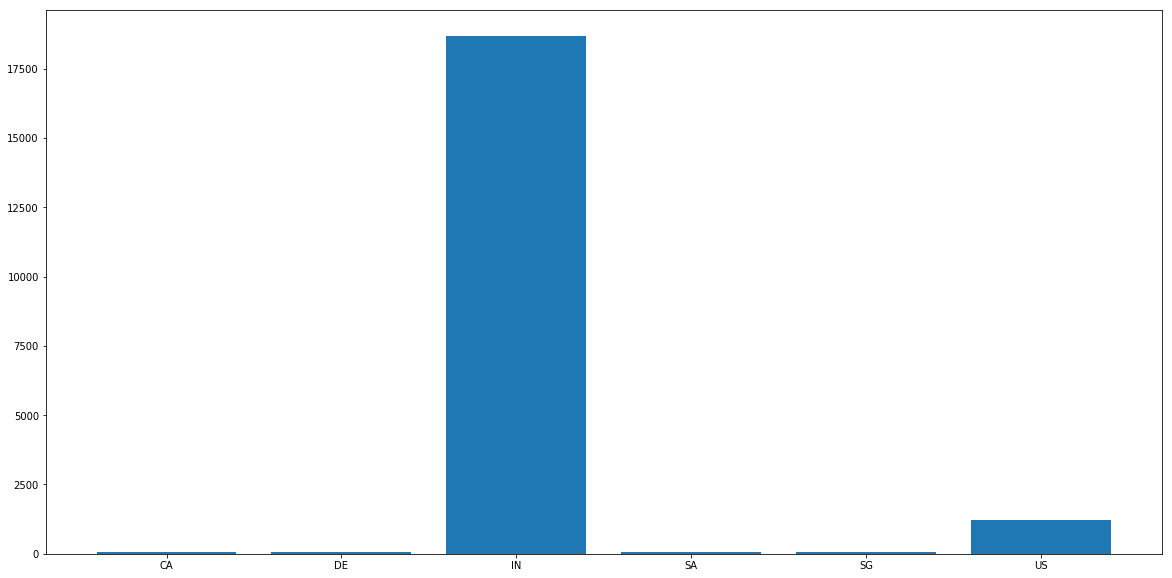

In [65]:
grouped_data = valid_leads['mp_country_code'].groupby([valid_leads['mp_country_code']]).count()
new_df = grouped_data.to_frame(name = 'size').reset_index()

new_df1 = new_df[new_df['size'] >= 50]

plt.figure(figsize=(20,10))
plt.bar(new_df1['mp_country_code'], new_df1['size'])

In [66]:
valid_leads.to_csv('mixpanel_leads.csv')